# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas para Captura e Tratamento de Dados</span>

## <span style="color:blue">Análise de Componentes Principais -  Avaliação</span>
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

Os exercícios abaixo farão uso do conjunto de dados <font style="font-family: monaco">blobs2.csv</font> disponível no _moodle_.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exercício 1)
Calcule as direções principais dos dados contidos no arquivo <font style="font-family: monaco">blobs2.csv</font>. Quais são os valores das duas maiores variâncias?

a) 338.02 e 271.17<br>
<font color='red'>b) 1162.75 e 993.63</font><br>
c) 271.17 e 160.90 <br>
d) 1074.60 e 338.02


In [2]:
from sklearn.decomposition import PCA

X = pd.read_csv('blobs2.csv').values

pca_obj=PCA(svd_solver='full')
X_transformed = pca_obj.fit(X)

print(X_transformed.explained_variance_[0:5])

[1162.75796919  993.6332352   958.55083238  862.61165292  761.97587147]


### Exercício 2)
Qual o número mínimo de direções principais necessárias para representar $90\%$ da informação contida nos dados?

a) 6<br>
<font color='red'>b) 5</font><br>
c) 4<br>
d) 3

In [3]:
percentage_info = 0.0
num_components = 0
for i in range(X_transformed.explained_variance_ratio_.shape[0]):
    percentage_info += X_transformed.explained_variance_ratio_[i]
    if percentage_info >= 0.9:
        num_components = i+1
        break
        
print('Numero de componentes contendo 90% da informacao: ',
     num_components)
print('\nPorcentagem da informacao: ',percentage_info)

Numero de componentes contendo 90% da informacao:  5

Porcentagem da informacao:  0.9035960522494768


### Exercício 3)
Existem _outliers_ nos dados originais. Utilize z-score com um threshold de 2.8 para identificar os outliers e removê-los dos dados. Quantos outliers foram identificados?

a) 6<br>
<font color='red'>b) 5</font><br>
c) 4<br>
d) 3

In [7]:
from scipy.stats import zscore

# calculando z-scores
Xzscore = zscore(X,axis=0)

# encontrando outliers
outliers = np.abs(Xzscore) > 2.8
outliers_id = np.argwhere(outliers == True)
print('quantidade de outliers: ',outliers_id.shape[0])

# removendo outliers
df = pd.DataFrame(data=X)
print(df.shape)
df = df.drop(outliers_id[:,0],axis=0)
print(df.shape)

X_no_outliers = df.values

quantidade de outliers:  5
(600, 25)
(595, 25)


### Exercício 4)
Qual a procentagem de informação representada pelas 4 primeiras componentes principais após a remoção dos outliers?

a) aproximadamente 90% <br>
<font color='red'> b) aproximadamente  97% </font><br>
c) aproximadamente 80% <br>
d) aproximadamente 87% 

In [8]:
pca_obj2=PCA(svd_solver='full')
X_no_outliers_transformed = pca_obj2.fit(X_no_outliers)

perc_exp = np.sum(X_no_outliers_transformed.explained_variance_ratio_[0:4])
print('Porcentagem de informacao representada pelas 4 primeiras componentes principais: ',
      100*perc_exp,'%')

Porcentagem de informacao representada pelas 4 primeiras componentes principais:  97.13384896745538 %


### Exercício 5)
Projete os dados sem outliers nas duas primeiras direções principais. Quantos clusters você consegue visualizar na projeção?

a) 6<br>
b) 5<br>
<font color='red'>c) 4</font><br>
d) 3.


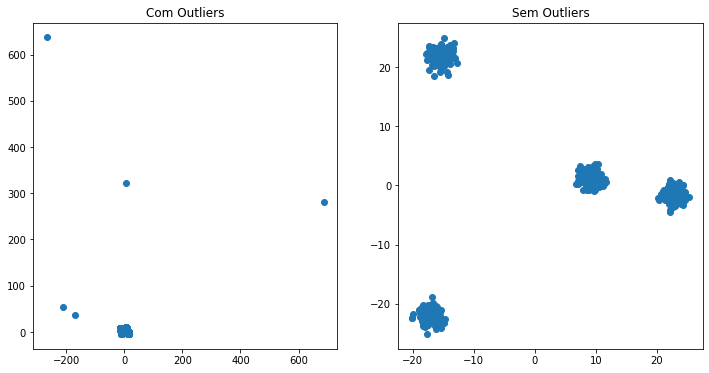

In [13]:
X2D = np.dot(X,X_transformed.components_[0:2].T)
X2D_no_outliers = np.dot(X_no_outliers,X_no_outliers_transformed.components_[0:2].T)

plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)
ax1.set_title('Com Outliers')
ax1.scatter(X2D[:,0],X2D[:,1])
ax2.set_title('Sem Outliers')
ax2.scatter(X2D_no_outliers[:,0],X2D_no_outliers[:,1])